(1) 数据预处理（数据变换、数据合并、数据清洗）<br>
(2) 数据分析<br>
(3) 数据分析结果可视化<br>
(4) 数据挖掘典型算法（分类、回归、聚类、关联等）挖掘数据的潜在价值,对训练好的模型进行评估（准确率、误差等）。<br>
(5) 对挖掘出来的结果给出合理的解释，并发现问题以及提出合理的建议。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
df = pd.read_csv('movies.csv',encoding='utf-8')
df.head()

,movie_id,movie_name,release,box_office,avg_price,avg_people,movie_score,movie_category,country,movie_link
0,1478901,热辣滚烫,2024-02-10,346055,48.035583,22,9.2,"喜剧,剧情",中国大陆,https://piaofang.maoyan.com/movie/1478901
1,1495728,飞驰人生2,2024-02-10,339865,48.039700,19,9.5,"喜剧,剧情",中国大陆,https://piaofang.maoyan.com/movie/1495728
2,1516983,抓娃娃,2024-07-16,332752,41.382668,14,9.4,"喜剧,剧情",中国大陆,https://piaofang.maoyan.com/movie/1516983
3,1489349,第二十条,2024-02-10,245473,46.338207,16,9.5,"喜剧,剧情,家庭",中国大陆,https://piaofang.maoyan.com/movie/1489349
4,1500234,熊出没·逆转时空,2024-02-10,200667,46.012600,22,9.4,"动画,喜剧,科幻",中国大陆,https://piaofang.maoyan.com/movie/1500234


In [3]:
# 输出列
df.columns

Index(['movie_id', 'movie_name', 'release', 'box_office', 'avg_price',
       'avg_people', 'movie_score', 'movie_category', 'country', 'movie_link'],
      dtype='object')

In [4]:
df.describe()

,movie_id,box_office,avg_price,avg_people
count,4.156000e+03,4156.000000,4156.000000,4156.000000
mean,6.627102e+05,12980.640520,35.579063,20.782964
std,5.810529e+05,39636.168498,36.880506,47.127189
min,1.000000e+00,1.000000,0.000000,0.000000
25%,7.846875e+04,309.000000,30.209264,5.000000
50%,3.444100e+05,1207.500000,32.870621,9.000000
75%,1.280840e+06,7495.500000,37.254765,18.000000
max,1.531668e+06,577242.000000,1919.673200,1400.000000


In [5]:
df[df["box_office"] == df["box_office"].max()]

,movie_id,movie_name,release,box_office,avg_price,avg_people,movie_score,movie_category,country,movie_link
896,257706,长津湖,2021-09-30,577242,46.393906,22,9.5,"剧情,历史,战争",中国大陆,https://piaofang.maoyan.com/movie/257706


In [6]:
# 查看票房超过10亿
df[df["box_office"] > 100000]

,movie_id,movie_name,release,box_office,avg_price,avg_people,movie_score,movie_category,country,movie_link
0,1478901,热辣滚烫,2024-02-10,346055,48.035583,22,9.2,"喜剧,剧情",中国大陆,https://piaofang.maoyan.com/movie/1478901
1,1495728,飞驰人生2,2024-02-10,339865,48.039700,19,9.5,"喜剧,剧情",中国大陆,https://piaofang.maoyan.com/movie/1495728
2,1516983,抓娃娃,2024-07-16,332752,41.382668,14,9.4,"喜剧,剧情",中国大陆,https://piaofang.maoyan.com/movie/1516983
3,1489349,第二十条,2024-02-10,245473,46.338207,16,9.5,"喜剧,剧情,家庭",中国大陆,https://piaofang.maoyan.com/movie/1489349
4,1500234,熊出没·逆转时空,2024-02-10,200667,46.012600,22,9.4,"动画,喜剧,科幻",中国大陆,https://piaofang.maoyan.com/movie/1500234
...,...,...,...,...,...,...,...,...,...,...
2960,78612,心花路放,2014-09-30,116947,34.445072,36,9.0,"爱情,喜剧",中国大陆,https://piaofang.maoyan.com/movie/78612
2961,589,西游记之大闹天宫,2014-01-31,104498,41.931633,40,5.2,"动作,奇幻","中国大陆,中国香港",https://piaofang.maoyan.com/movie/589
3259,78003,西游·降魔篇,2013-02-10,124695,40.227020,41,8.4,"喜剧,奇幻,冒险","中国大陆,中国香港",https://piaofang.maoyan.com/movie/78003
3559,938,人再囧途之泰囧,2012-12-12,100292,32.402790,57,8.7,"喜剧,冒险,爱情",中国大陆,https://piaofang.maoyan.com/movie/938


In [7]:
df.dtypes

movie_id            int64
movie_name         object
release            object
box_office          int64
avg_price         float64
avg_people          int64
movie_score        object
movie_category     object
country            object
movie_link         object
dtype: object

In [8]:
df["release"] = pd.to_datetime(df["release"])

In [9]:
df['year'] = df['release'].dt.year
df['month'] = df['release'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156 entries, 0 to 4155
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movie_id        4156 non-null   int64         
 1   movie_name      4156 non-null   object        
 2   release         4156 non-null   datetime64[ns]
 3   box_office      4156 non-null   int64         
 4   avg_price       4156 non-null   float64       
 5   avg_people      4156 non-null   int64         
 6   movie_score     4156 non-null   object        
 7   movie_category  4151 non-null   object        
 8   country         4156 non-null   object        
 9   movie_link      4156 non-null   object        
 10  year            4156 non-null   int32         
 11  month           4156 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(5)
memory usage: 357.3+ KB


In [10]:
df[df['movie_score']=="暂无评分"] = None
df['movie_score'] = df['movie_score'].astype(float)
df['movie_score']

0       9.2
1       9.5
2       9.4
3       9.5
4       9.4
       ... 
4151    NaN
4152    8.0
4153    5.9
4154    4.1
4155    6.9
Name: movie_score, Length: 4156, dtype: float64

In [11]:
mean_value = df['movie_score'].mean()
df['movie_score'] = df['movie_score'].fillna(mean_value)

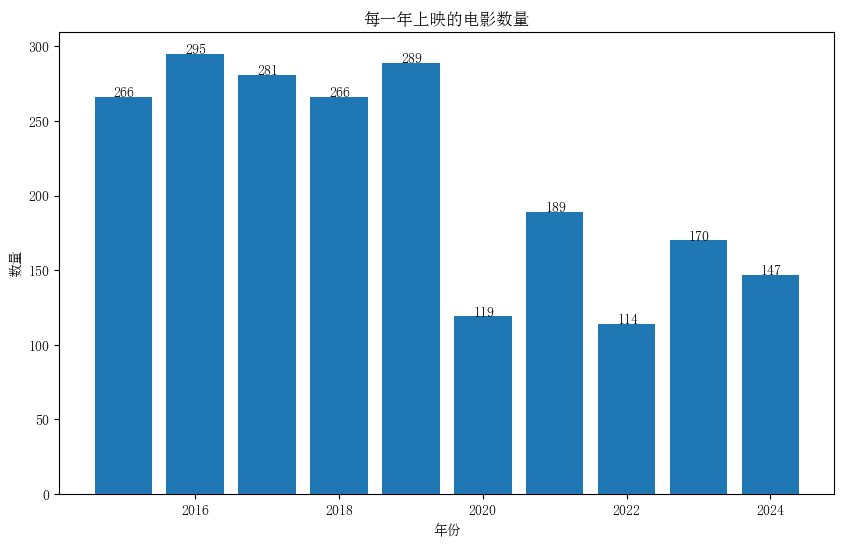

In [12]:
# 统计每一年上映的电影数量
year_movies = df[(df["year"] >= 2015)].groupby("year")["movie_id"].count()

# 可视化
plt.figure(figsize=(10, 6))
bars = plt.bar(year_movies.index, year_movies.values)        
plt.title("每一年上映的电影数量")
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/3,bar.get_height(),bar.get_height())
plt.xlabel("年份")
plt.ylabel("数量")
plt.show()

In [13]:
# 统计年度票房
box_office_per_year = df.groupby('year')["box_office"].sum()
box_office_per_year = box_office_per_year.loc[2015:2024]
box_office_per_year

year
2015.0    4430065.0
2016.0    4504154.0
2017.0    5648771.0
2018.0    5843342.0
2019.0    6206828.0
2020.0    2009389.0
2021.0    4447251.0
2022.0    2878516.0
2023.0    5502010.0
2024.0    3706885.0
Name: box_office, dtype: float64

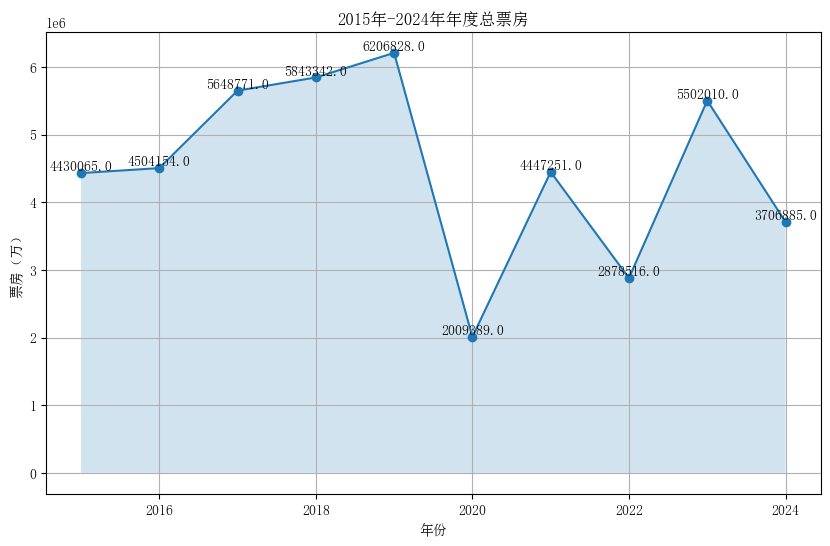

In [14]:
plt.figure(figsize=(10,6))
plt.plot(box_office_per_year.index,box_office_per_year.values,marker='o')
plt.xlabel('年份')
plt.ylabel('票房（万）')
plt.grid(True)
# 填充
plt.fill_between(box_office_per_year.index,box_office_per_year.values,0,alpha=0.2)
plt.title('2015年-2024年年度总票房')
for index,values in zip(box_office_per_year.index,box_office_per_year.values):
    plt.text(index,values,str(values),ha='center',va='bottom',fontsize=10)
plt.show()

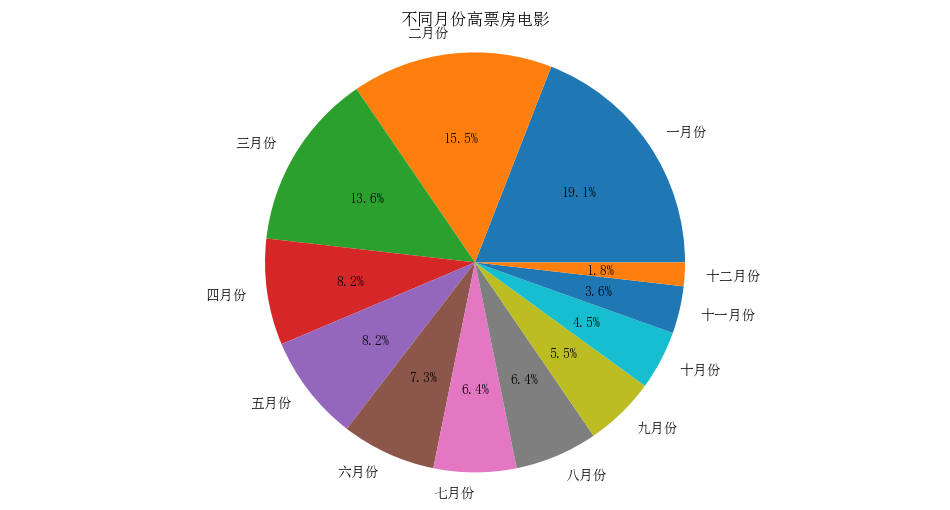

In [15]:
high_box_office_movie = df[df['box_office'] > 100000]
# 统计每个月的电影数量
movie_count = high_box_office_movie['month'].value_counts()

# 可视化
plt.figure(figsize=(12, 6))
plt.pie(movie_count, labels=["一月份", "二月份", "三月份", "四月份", "五月份", "六月份", "七月份", "八月份", "九月份", "十月份", "十一月份", "十二月份"], autopct='%.1f%%')
plt.axis('equal')
plt.title('不同月份高票房电影')
plt.show()

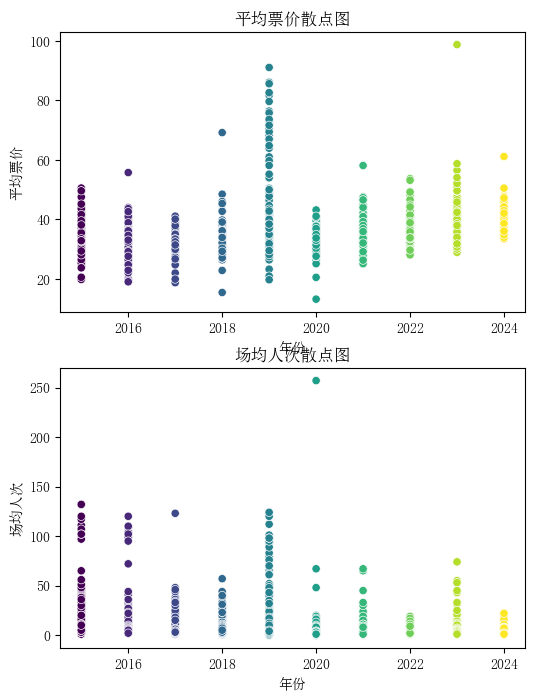

In [16]:
import seaborn as sns
# 年度平均票价和场均人次散点图
df_filtered = df[(df['year'] >= 2015) & (df['year'] <= 2024)]
df_filtered = df_filtered[df_filtered['avg_price'] <= 100]
plt.figure(figsize=(6,8))
# 绘制子图
plt.subplot(2,1,1)
sns.scatterplot(y='avg_price',x='year',data=df_filtered,c=df_filtered['year'])
plt.title('平均票价散点图')
plt.xlabel('年份')
plt.ylabel('平均票价')
plt.subplot(2,1,2)
sns.scatterplot(y='avg_people',x='year',data=df_filtered,c=df_filtered['year'])
plt.title('场均人次散点图')
plt.xlabel('年份')
plt.ylabel('场均人次')
plt.show()


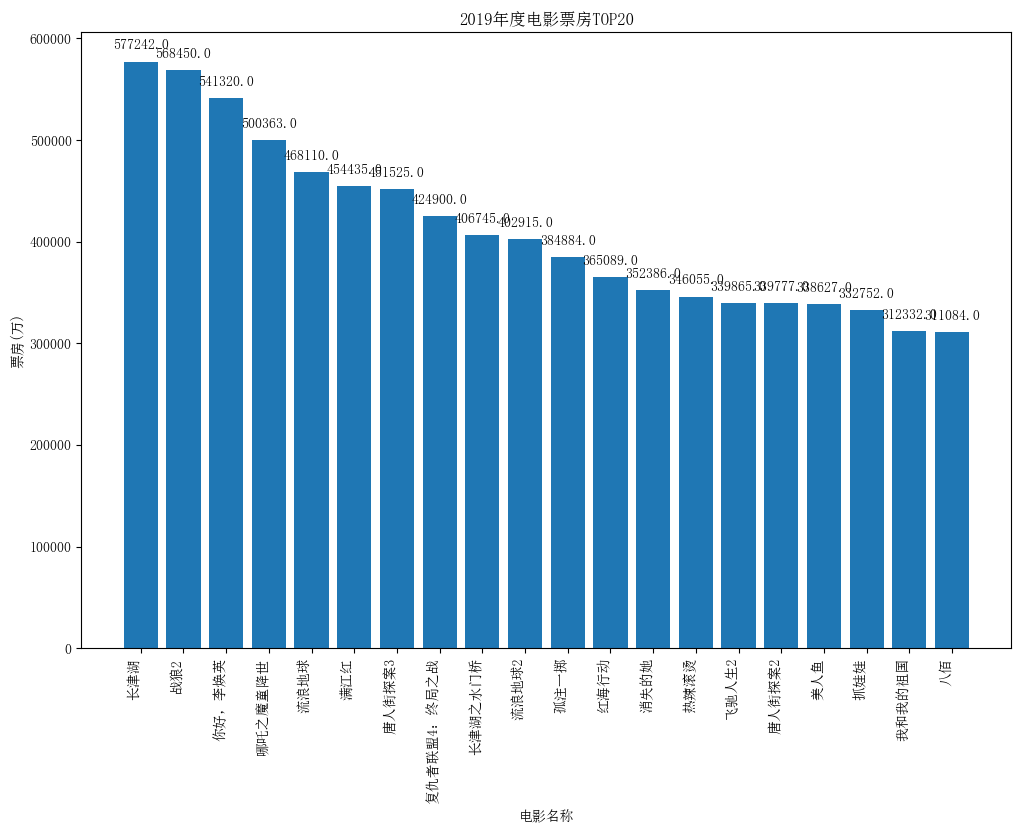

In [17]:
top_20_movies = df.sort_values(by="box_office",ascending=False).head(20)

plt.figure(figsize=(12,8))
bars = plt.bar(top_20_movies["movie_name"],top_20_movies["box_office"].values)
plt.xticks(rotation=90,ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+10000, str(height), ha="center", va="bottom")
plt.xlabel("电影名称")
plt.ylabel("票房(万)")
plt.title("2019年度电影票房TOP20")
plt.show()

# 建模及评估

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
df.columns

Index(['movie_id', 'movie_name', 'release', 'box_office', 'avg_price',
       'avg_people', 'movie_score', 'movie_category', 'country', 'movie_link',
       'year', 'month'],
      dtype='object')

In [23]:
features = ["year","month","avg_price","avg_people","movie_score"]
label = "box_office"
df.fillna(0, inplace=True)
X = df[features]
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
# 将训练好的模型对测试集进行测试，并返回预测的结果
y_pred = model.predict(X_test)
# 计算模型均方误差
mse = mean_squared_error(y_test, y_pred)

# 使用训练集均值作为所有测试集样本的预测值
y_pred_baseline = [y_train.mean()] *len(y_test)
# 计算基准模型的均方误差
mse_baseline = mean_squared_error(y_test,y_pred_baseline)
print("模型均方误差:", mse)
print("基准模型均方误差:",mse_baseline)


模型均方误差: 851170724.5189703
基准模型均方误差: 1944621567.790112


['month', 'year', 'avg_price', 'movie_score', 'avg_people']
[0.09321377250451204, 0.15845492921973212, 0.21583931213797838, 0.22499883631163015, 0.30749314982614734]


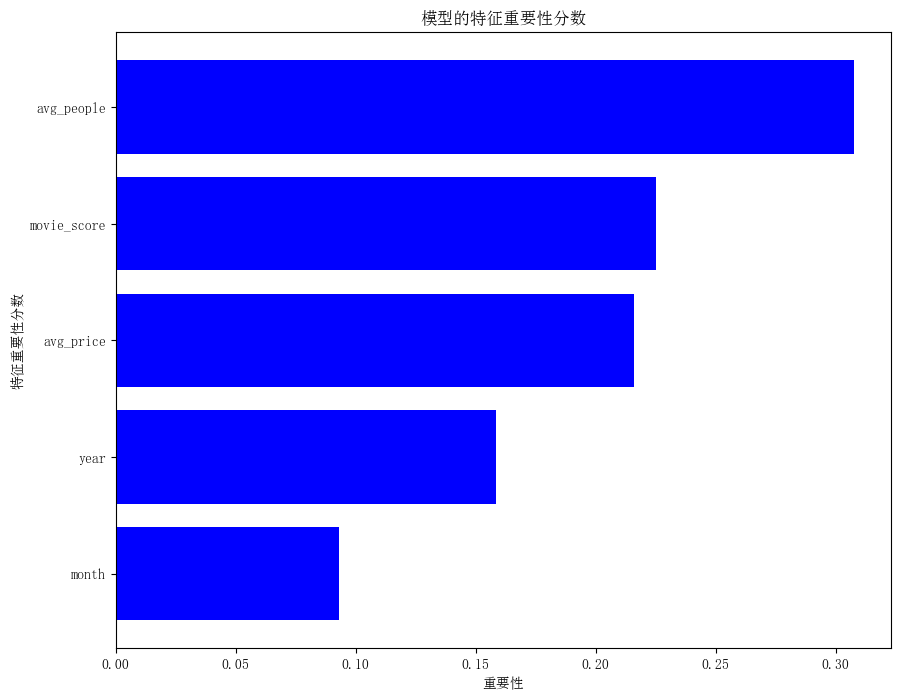

In [24]:
# 获取特征重要性
feature_importances = model.feature_importances_
# 创建特征名称和重要性的分数的映射
feature_importances_dict = dict(zip(features, feature_importances))
# 按照重要性排序
feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1],reverse=False)

sorted_features = [item[0] for item in feature_importances]
sorted_importances = [ item[1] for item in feature_importances]    
print(sorted_features)
print(sorted_importances)
# 可视化特征重要性
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances,color='blue')
plt.xlabel("重要性")
plt.ylabel("特征重要性分数")
plt.title("模型的特征重要性分数")
plt.show()


主要的影响因素：场均人次，这个特征显著高于其它特征，观众的参与是影响票房的主要因素之一，其它特征如，评分、年份、电影时长等因素也对票房有一定的影响，但相对较小。这些因素也可能间接影响票房

建议：通过观众参与度：通过营销活动、口碑传播等方式增加观众的参与度，提高场均人次以提高票房。提高电影的质量，注重电影的质量，提高观众的反馈，提高评分。合理定价，根据时长的情况和观众接受程度，合理定价，避免过高或过低。选择合适的上映时间：考虑不同月份的市场环境和观众需求，选择合适的上映时间，最大化票房收益。


In [36]:
# 预测
new_movie_features = {
    "year":2025,
    "month":2,
    "avg_price":40,
    "avg_people":10,
    "movie_score":8.6,
}
new_movie_df = pd.DataFrame([new_movie_features])
model.predict(new_movie_df)

array([42249.41])